# 0-Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay, balanced_accuracy_score
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape

from keras import regularizers
from keras.optimizers import Adam
#from keras.backend import expand_dims
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras.constraints import MaxNorm
from keras.layers import Activation, Dense, Conv1D, Flatten, MaxPooling1D, Dropout, BatchNormalization, SpatialDropout1D

## Librerias oversampling


In [5]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [6]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# 1- Load Data

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.utils import shuffle
from tensorflow.keras import layers


In [8]:
s_aureus = pd.read_csv('s_aureus_driams_a_bin3_2000_20000Da.csv')
s_aureus = s_aureus.fillna(0)
s_aureus

,2000,2003,2006,2009,2012,2015,2018,2021,2024,2027,...,19991,19994,19997,code,species,Oxacillin,Clindamycin,Ceftriaxone,Ciprofloxacin,Fusidic acid
0,951.428571,826.125000,944.857143,898.428571,1007.714286,936.000000,828.571429,812.000000,782.714286,741.625000,...,35.5,20.500000,27.342857,029f0abf-1664-424f-88cb-11c9c8af2b11,Staphylococcus aureus,0.0,0.0,0.0,0.0,1.0
1,784.714286,701.125000,681.571429,762.142857,737.571429,733.000000,735.857143,659.571429,802.714286,554.375000,...,30.0,40.500000,34.695238,08149af1-10f5-4f02-81d8-3d46d66d4a7a,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
2,50.875000,89.142857,56.142857,151.285714,132.714286,110.428571,47.285714,63.428571,100.375000,52.142857,...,2.5,30.500000,11.288462,08fe3876-ecee-4ddc-9aa9-a84f605757f7,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
3,843.285714,816.500000,734.428571,1027.142857,979.428571,875.571429,912.142857,714.428571,945.428571,886.500000,...,15.5,8.000000,20.057143,0a9fdd4b-7180-47c0-849e-cb32d46da94c,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
4,307.857143,295.000000,246.714286,181.571429,258.000000,318.714286,295.714286,300.857143,278.142857,256.125000,...,25.5,32.000000,24.990476,0d82f4c4-473c-49d8-8c85-e3e36e96d047,Staphylococcus aureus,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3786,288.000000,330.285714,296.142857,265.142857,310.750000,287.000000,345.000000,260.000000,198.714286,257.285714,...,0.0,0.000000,0.004038,fe72a46e-021e-4f0c-b81e-c4c4507e5aa8_MALDI2,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
3787,1286.142857,989.714286,938.285714,901.428571,872.000000,1001.000000,1061.571429,890.857143,813.857143,961.000000,...,0.0,0.000000,0.053908,fe73e705-161f-49a7-b021-7e78d074129b_MALDI2,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
3788,986.857143,977.285714,892.285714,986.714286,1045.875000,986.857143,963.571429,968.571429,960.857143,969.714286,...,0.0,0.000000,0.039084,feb54c45-54f7-4758-8408-2e94ab6c53e1_MALDI2,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
3789,141.857143,197.428571,148.142857,114.000000,125.857143,158.750000,176.571429,148.285714,149.714286,151.714286,...,0.0,0.000000,0.012113,fef2ea82-be15-4e10-8685-77c42068455c_MALDI2,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0


# Preprocessing Data

In [9]:
s_aureus_oxacillin = s_aureus.drop(columns=['code','species', 'Clindamycin', 'Ceftriaxone', 'Ciprofloxacin', 'Fusidic acid'])
s_aureus_oxacillin.dropna(axis=0, how="any", inplace=True)

In [10]:
s_aureus_ceftriaxone = s_aureus.drop(columns=['Oxacillin', 'Clindamycin', 'Ceftriaxone', 'Fusidic acid'])
#ceftriaxone.dropna(axis=0, how="any", inplace=True)
s_aureus_ceftriaxone.dropna(axis=0, how="any", inplace=True)
s_aureus_ceftriaxone.shape

(3791, 6003)

In [11]:
s_aureus_oxacillin.head()

,2000,2003,2006,2009,2012,2015,2018,2021,2024,2027,...,19973,19976,19979,19982,19985,19988,19991,19994,19997,Oxacillin
0,951.428571,826.125000,944.857143,898.428571,1007.714286,936.000000,828.571429,812.000000,782.714286,741.625000,...,14.333333,24.0,68.0,19.0,19.000000,50.0,35.5,20.5,27.342857,0.0
1,784.714286,701.125000,681.571429,762.142857,737.571429,733.000000,735.857143,659.571429,802.714286,554.375000,...,15.666667,39.0,19.5,42.0,69.666667,31.0,30.0,40.5,34.695238,0.0
2,50.875000,89.142857,56.142857,151.285714,132.714286,110.428571,47.285714,63.428571,100.375000,52.142857,...,20.666667,17.0,2.0,18.0,18.000000,11.5,2.5,30.5,11.288462,0.0
3,843.285714,816.500000,734.428571,1027.142857,979.428571,875.571429,912.142857,714.428571,945.428571,886.500000,...,22.333333,33.0,29.0,14.5,21.666667,24.5,15.5,8.0,20.057143,0.0
4,307.857143,295.000000,246.714286,181.571429,258.000000,318.714286,295.714286,300.857143,278.142857,256.125000,...,26.666667,25.5,18.0,53.5,23.000000,24.5,25.5,32.0,24.990476,1.0


In [12]:
X = s_aureus_oxacillin.iloc[:, 0:6000].values  # variables independientes (espectros de masa)
y = s_aureus_oxacillin.iloc[:, 6000].values    # variable dependientes (resistencia a ciprofloxacin)
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [15]:
X_train

array([[-0.39234772, -0.4328882 , -0.42397916, ...,  0.2516329 ,
         0.27382737,  0.04491132],
       [-0.49214137, -0.5005734 , -0.47686246, ..., -0.56689554,
        -0.56091934, -0.59598553],
       [-0.33472997, -0.40271908, -0.35519633, ..., -0.38830754,
         0.2489837 ,  0.00755902],
       ...,
       [-0.12541495, -0.03057765, -0.05932636, ..., -0.2791704 ,
        -0.14354599, -0.30955842],
       [ 0.01859542, -0.05076646,  0.01312031, ..., -0.1650725 ,
         0.3781707 ,  0.08042048],
       [-0.1681521 , -0.17944825, -0.1268649 , ...,  0.2962799 ,
         0.244015  ,  0.88604414]], dtype=float32)

## Aplicacion de gan

In [16]:
filtered_data = s_aureus_oxacillin[s_aureus_oxacillin['Oxacillin'] == 1].iloc[:, 0:6000].values 


In [17]:
etiquetas = s_aureus_oxacillin[s_aureus_oxacillin['Oxacillin'] == 1].iloc[:, 6000].values

In [18]:
train_set = [
    (filtered_data[i], etiquetas[i]) for i in range(len(filtered_data))
]

Etiquetas

In [19]:
import torch

# Supongamos que tienes las etiquetas de clase como un array
y_train = np.array(y_train)  # Ejemplo de etiquetas de entrenamiento

# Convertir las etiquetas a formato one-hot
num_classes = 2  # Solo tenemos dos clases (0 y 1)
y_train_one_hot = torch.zeros(len(y_train), num_classes)
y_train_one_hot[range(len(y_train)), y_train.astype(int)] = 1

print(y_train_one_hot)



tensor([[0., 1.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])


In [20]:
y_train

array([1., 1., 0., ..., 0., 0., 0.], dtype=float32)

In [21]:
from sklearn.decomposition import PCA
# Reducir dimensiones con PCA
pca = PCA(n_components=2)
X_train_pca_2d = pca.fit_transform(X_train)

In [22]:
X_train

array([[-0.39234772, -0.4328882 , -0.42397916, ...,  0.2516329 ,
         0.27382737,  0.04491132],
       [-0.49214137, -0.5005734 , -0.47686246, ..., -0.56689554,
        -0.56091934, -0.59598553],
       [-0.33472997, -0.40271908, -0.35519633, ..., -0.38830754,
         0.2489837 ,  0.00755902],
       ...,
       [-0.12541495, -0.03057765, -0.05932636, ..., -0.2791704 ,
        -0.14354599, -0.30955842],
       [ 0.01859542, -0.05076646,  0.01312031, ..., -0.1650725 ,
         0.3781707 ,  0.08042048],
       [-0.1681521 , -0.17944825, -0.1268649 , ...,  0.2962799 ,
         0.244015  ,  0.88604414]], dtype=float32)

In [23]:
y_train

array([1., 1., 0., ..., 0., 0., 0.], dtype=float32)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_pca_2d_normalizer = scaler.fit_transform(X_train_pca_2d)


In [76]:
train_set = [
    (torch.tensor(X_train[i]), torch.tensor(y_train[i])) for i in range(len(X_train))
]

In [77]:
train_set

[(tensor([-0.3923, -0.4329, -0.4240,  ...,  0.2516,  0.2738,  0.0449]),
  tensor(1.)),
 (tensor([-0.4921, -0.5006, -0.4769,  ..., -0.5669, -0.5609, -0.5960]),
  tensor(1.)),
 (tensor([-0.3347, -0.4027, -0.3552,  ..., -0.3883,  0.2490,  0.0076]),
  tensor(0.)),
 (tensor([-0.3096, -0.3509, -0.3020,  ..., -0.5967, -0.6355, -0.6311]),
  tensor(0.)),
 (tensor([ 0.7094,  0.8924,  0.9975,  ..., -0.3585, -0.3671, -0.3253]),
  tensor(0.)),
 (tensor([0.1608, 0.1161, 0.1291,  ..., 0.7725, 0.5769, 0.5469]), tensor(0.)),
 (tensor([-0.3666, -0.3574, -0.3616,  ..., -0.6264, -0.6355, -0.6409]),
  tensor(0.)),
 (tensor([ 0.0019, -0.0817, -0.0295,  ..., -0.6264, -0.6355, -0.6460]),
  tensor(0.)),
 (tensor([-0.3662, -0.3490, -0.3487,  ..., -0.5272, -0.5162, -0.5434]),
  tensor(1.)),
 (tensor([-0.4097, -0.3936, -0.3858,  ...,  0.7874,  0.2987,  0.6774]),
  tensor(0.)),
 (tensor([-0.4450, -0.4770, -0.4039,  ..., -0.0460, -0.2330, -0.2774]),
  tensor(0.)),
 (tensor([-0.4015, -0.3705, -0.3299,  ...,  0.5493,

In [25]:
class Discriminator(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(6000 + num_classes, 1024),  # Entrada: 6000 dimensiones + etiquetas
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x, labels):
        # Concatenar las muestras con las etiquetas
        x = torch.cat((x, labels), dim=1)
        return self.model(x)

In [43]:
class Generator(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100 + num_classes, 512),  # Latent space: 100 dimensiones
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 6000),  # Salida: 6000 dimensiones
        )

    def forward(self, x, labels):
        # Concatenar el ruido con las etiquetas
        x = torch.cat((x, labels), dim=1)
        return self.model(x)

In [44]:
generator = Generator(2)
discriminator = Discriminator(2)


In [28]:
lr = 0.0002
num_epochs = 600
loss_function = nn.BCELoss()

In [29]:
batch_size = 32
latent_dim = 100  # Dimensiones del espacio latente
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, drop_last=True)


In [30]:
train_set

[(array([307.85714286, 295.        , 246.71428571, ...,  25.5       ,
          32.        ,  24.99047619]),
  1.0),
 (array([233.14285714, 282.5       , 276.14285714, ...,  18.        ,
          31.5       ,  16.2952381 ]),
  1.0),
 (array([539.57142857, 631.25      , 579.        , ...,  17.        ,
          30.        ,  23.18095238]),
  1.0),
 (array([808.57142857, 957.625     , 807.28571429, ...,  34.5       ,
          36.5       ,  30.16190476]),
  1.0),
 (array([694.28571429, 700.75      , 525.57142857, ...,  13.5       ,
          23.5       ,  20.77142857]),
  1.0),
 (array([737.28571429, 759.5       , 638.        , ...,  11.5       ,
          25.        ,  26.27619048]),
  1.0),
 (array([611.28571429, 845.125     , 618.        , ...,  13.5       ,
           5.5       ,  25.4952381 ]),
  1.0),
 (array([392.71428571, 317.375     , 388.28571429, ...,  20.5       ,
          15.5       ,  14.38095238]),
  1.0),
 (array([180.85714286, 301.25      , 202.85714286, ...,  54.    

In [31]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr * 0.5)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [33]:
# Entrenamiento
for epoch in range(num_epochs):
    for n, (real_samples, labels) in enumerate(train_loader):
        # Convertir los datos reales a Float
        real_samples = real_samples.float()
        labels = labels.long()  # Asegurar que las etiquetas sean enteros largos para one-hot
        
        # Etiquetas one-hot
        labels_one_hot = torch.zeros(batch_size, 2).float()  # Convertir a Float
        labels_one_hot.scatter_(1, labels.view(-1, 1), 1)

        # Datos reales
        real_samples_labels = torch.ones((batch_size, 1)).float()  # Convertir a Float

        # Datos generados
        latent_space_samples = torch.randn((batch_size, latent_dim)).float()  # Convertir a Float
        generated_samples = generator(latent_space_samples, labels_one_hot)
        generated_samples_labels = torch.zeros((batch_size, 1)).float()  # Convertir a Float

        # Entrenar el discriminador
        discriminator.zero_grad()
        all_samples = torch.cat((real_samples, generated_samples)).float()  # Convertir a Float
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels)).float()  # Convertir a Float
        all_labels_one_hot = torch.cat((labels_one_hot, labels_one_hot)).float()  # Convertir a Float
        output_discriminator = discriminator(all_samples, all_labels_one_hot)
        loss_discriminator = loss_function(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Entrenar el generador
        generator.zero_grad()
        latent_space_samples = torch.randn((batch_size, latent_dim)).float()  # Convertir a Flo|at
        generated_samples = generator(latent_space_samples, labels_one_hot)
        output_discriminator_generated = discriminator(generated_samples, labels_one_hot)
        loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

    # Mostrar pérdidas cada 10 épocas
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss D: {loss_discriminator.item()}, Loss G: {loss_generator.item()}")


Epoch: 0, Loss D: 1.443618655204773, Loss G: 0.8668322563171387
Epoch: 10, Loss D: 0.40141239762306213, Loss G: 2.326702833175659
Epoch: 20, Loss D: 3.3077175617218018, Loss G: 0.012331187725067139
Epoch: 30, Loss D: 7.348359107971191, Loss G: 0.684792160987854
Epoch: 40, Loss D: 0.7781605124473572, Loss G: 0.30179765820503235
Epoch: 50, Loss D: 0.7116260528564453, Loss G: 0.48627132177352905
Epoch: 60, Loss D: 1.4924942255020142, Loss G: 0.6553092002868652
Epoch: 70, Loss D: 0.4597539007663727, Loss G: 0.5786868929862976
Epoch: 80, Loss D: 0.37850868701934814, Loss G: 0.7014893293380737
Epoch: 90, Loss D: 0.33919239044189453, Loss G: 0.7628835439682007
Epoch: 100, Loss D: 0.31393495202064514, Loss G: 0.7454184293746948
Epoch: 110, Loss D: 0.33379679918289185, Loss G: 0.8500831723213196
Epoch: 120, Loss D: 0.3596840500831604, Loss G: 0.7844518423080444
Epoch: 130, Loss D: 0.3070225417613983, Loss G: 1.0018980503082275
Epoch: 140, Loss D: 0.30768975615501404, Loss G: 0.7952271699905396


In [34]:
import matplotlib.pyplot as plt

# Generar datos de prueba
latent_space_samples = torch.randn((3000, 2))  # Ruido para 100 muestras
labels = torch.randint(0, 2, (3000,))  # Etiquetas aleatorias (0 o 1)

# Convertir etiquetas a one-hot
labels_one_hot = torch.zeros(len(labels), 2)
labels_one_hot.scatter_(1, labels.view(-1, 1).long(), 1)

# Generar datos con el generador
generated_samples = generator(latent_space_samples, labels_one_hot).detach().numpy()
labels_numpy = labels.numpy()  # Convertir las etiquetas a numpy para graficar

# Separar puntos por clase
class_0 = generated_samples[labels_numpy == 0]
class_1 = generated_samples[labels_numpy == 1]

# Graficar datos generados con etiquetas
plt.figure(figsize=(8, 6))
plt.scatter(class_1[:, 0], class_1[:, 1], label='Clase 1', alpha=0.6, color='orange')
#plt.scatter(class_0[:, 0], class_0[:, 1], label='Clase 0', alpha=0.6, color='blue')

plt.title("Datos generados con etiquetas")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.legend()
plt.grid()
plt.show()


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3000x4 and 102x512)

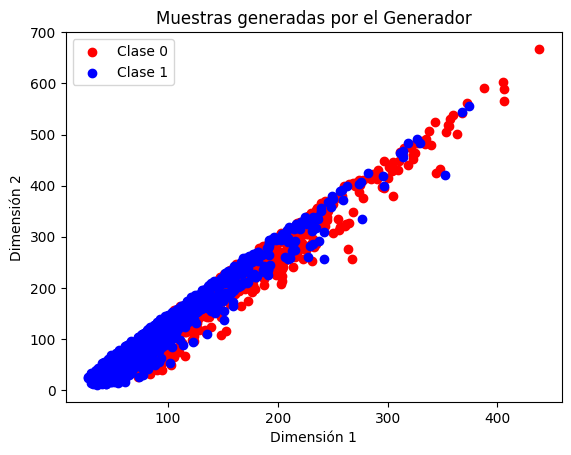

In [35]:
import torch
import matplotlib.pyplot as plt

# Asegúrate de que el generador está en el mismo dispositivo que los datos
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = generator.to(device)

# Generar datos de prueba
latent_space_samples = torch.randn((3000, 100)).to(device)  # Ruido para 3000 muestras, usando 100 dimensiones de latente
labels = torch.randint(0, 2, (3000,)).to(device)  # Etiquetas aleatorias (0 o 1)

# Convertir etiquetas a one-hot
labels_one_hot = torch.zeros(len(labels), 2).to(device)
labels_one_hot.scatter_(1, labels.view(-1, 1).long(), 1)

# Generar datos con el generador
generated_samples = generator(latent_space_samples, labels_one_hot).detach().cpu().numpy()
labels_numpy = labels.cpu().numpy()  # Convertir las etiquetas a numpy para graficar

# Separar puntos por clase
class_0 = generated_samples[labels_numpy == 0]
class_1 = generated_samples[labels_numpy == 1]

# Visualización
plt.scatter(class_0[:, 0], class_0[:, 1], color='red', label='Clase 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Clase 1')
plt.legend()
plt.title("Muestras generadas por el Generador")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.show()


In [103]:
class_0

array([[-0.35710847, -0.22114392],
       [-0.48618126, -0.26047042],
       [-0.17956747,  0.51566267],
       ...,
       [-0.08926402,  0.5092628 ],
       [ 0.527101  ,  1.6814466 ],
       [-0.60298973, -0.127492  ]], dtype=float32)

In [73]:
print(pd.Series(y_train).value_counts())

0.0    2451
1.0     581
Name: count, dtype: int64


In [72]:
len(X_train)

3032

## aquiii

In [48]:
array_ones = np.ones(pd.Series(y_train).value_counts()[0]-pd.Series(y_train).value_counts()[1])
array_ones = np.asarray(array_ones).astype(np.float32)

In [37]:

# Asegúrate de que el generador esté en modo de evaluación
generator.eval()

# Definir el tamaño del batch que deseas generar
batch_size = pd.Series(y_train).value_counts()[0]-pd.Series(y_train).value_counts()[1]  # Puedes generar tantas muestras como desees



In [40]:
# Generar un tensor de tamaño (batch_size, 100) con valores aleatorios (espacio latente)
latent_space_samples = torch.randn(batch_size, 100).float()





In [50]:
# Generar las muestras sintéticas utilizando el generador
synthetic_samples = generator(array_ones,latent_space_samples)

# Convertir el tensor de PyTorch a un arreglo de NumPy
synthetic_samples_numpy = synthetic_samples.detach().cpu().numpy()

TypeError: expected Tensor as element 0 in argument 0, but got numpy.ndarray

In [ ]:

# Cambiar el tipo de datos a float32
synthetic_samples_numpy = synthetic_samples_numpy.astype(np.float32)

# Mostrar las muestras generadas
print(synthetic_samples)
synthetic_samples_numpy.shape
X_train_balanced = np.concatenate((X_train,synthetic_samples_numpy))
array_ones = np.ones(pd.Series(y_train).value_counts()[0]-pd.Series(y_train).value_counts()[1])
array_ones = np.asarray(array_ones).astype(np.float32)

y_train_balanced = np.concatenate((y_train, array_ones))

pd.Series(y_train).value_counts()

In [ ]:
X_train_balanced = np.concatenate((X_train,synthetic_samples_numpy))

In [ ]:
print(pd.Series(y_train_balanced).value_counts())


0.0    2451
1.0    2451
Name: count, dtype: int64


In [ ]:
scaler=Normalizer(norm='max')
sc_X = scaler
X_train = sc_X.fit_transform(X_train_balanced)
X_test = sc_X.transform(X_test)

In [ ]:
X_train_balanced.shape[0]

4902

In [ ]:
sample_size = X_train_balanced.shape[0] # numero de muestras en el set de datos
time_steps  = X_train_balanced.shape[1] # numero de atributos en el set de datos
input_dimension = 1            #

X_train_reshaped = X_train_balanced.reshape(sample_size,time_steps,input_dimension)
X_test_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.000001)
early_st = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

n_timesteps = X_train_reshaped.shape[1] #
n_features  = X_train_reshaped.shape[2] #

# Create and fit DeepAMR model

In [ ]:
model = Sequential(name="Modelo_s_aureus_ciprofloxacin")
init_mode = 'normal'
model.add(Conv1D(filters=(64), kernel_size=(17), input_shape = (n_timesteps,n_features), name='Conv_1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_1"))

model.add(Conv1D(filters=(128), kernel_size=(9),kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),  name='Conv_2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_2"))

model.add(Conv1D(filters=(256), kernel_size=(5),kernel_initializer=init_mode,kernel_regularizer=regularizers.l2(0.0001),   name='Conv_3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_3"))

model.add(Conv1D(filters=(256), kernel_size=(5),kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),   name='Conv_4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_4"))

model.add(Flatten())
model.add(Dropout(0.65))
model.add(Dense(256, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001), name="fully_connected_0"))
model.add(Dense(64, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001), name="fully_connected_1"))
model.add(Dense(64, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),  name="fully_connected_2"))
model.add(Dense(n_features, activation='sigmoid', name="OUT_Layer"))

model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'binary_crossentropy',  metrics=METRICS)
model.summary()

/home/hpinto/.local/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Modelo_s_aureus_ciprofloxacin"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv1D)                 │ (None, 5984, 64)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5984, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 5984, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1D_1 (MaxPooling1D)   │ (None, 2992, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv1D)                 │ (None, 2984, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2984, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 2984, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1D_2 (MaxPooling1D)   │ (None, 1492, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_3 (Conv1D)                 │ (None, 1488, 256)      │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1488, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1488, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1D_3 (MaxPooling1D)   │ (None, 744, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_4 (Conv1D)                 │ (None, 740, 256)       │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 740, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 740, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1D_4 (MaxPooling1D)   │ (None, 370, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 94720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 94720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_0 (Dense)       │ (None, 256)            │    24,248,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_1 (Dense)       │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_2 (Dense)       │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OUT_Layer (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,839,105 (94.75 MB)

 Trainable params: 24,837,697 (94.75 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
history = model.fit(X_train_reshaped, y_train_balanced, epochs=1, batch_size=10, verbose=1, validation_split=0.1, callbacks=[reduce_lr,early_st])

E0000 00:00:1733438931.072205 3674732 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.1 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1733438931.239136 3674732 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.1 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2024-12-05 19:48:51.250310: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at xla_ops.cc:577 : FAILED_PRECONDITION: DNN library initialization failed. Look at the er

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/usr/lib/python3.9/runpy.py", line 87, in _run_code

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/hpinto/.local/lib/python3.9/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/hpinto/.local/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.9/asyncio/base_events.py", line 596, in run_forever

  File "/usr/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once

  File "/usr/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/tmp/ipykernel_3674476/2643947770.py", line 1, in <module>

  File "/home/hpinto/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/hpinto/.local/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 368, in fit

  File "/home/hpinto/.local/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 216, in function

  File "/home/hpinto/.local/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 129, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_7962]

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)



RuntimeError: Physical devices cannot be modified after being initialized

# Evaluate the model

In [ ]:
y_pred  = model.predict(X_test_reshaped)
y_pred = (y_pred>0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step
[[614   0]
 [145   0]]


In [ ]:
print("balanced acuracy:", balanced_accuracy_score(y_test, y_pred))

balanced acuracy: 0.5


In [ ]:
target_names=["0","1"]
print(classification_report(y_test, y_pred, target_names=target_names))

train_predictions_baseline = model.predict(X_train_reshaped, batch_size=10)
test_predictions_baseline = model.predict(X_test_reshaped, batch_size=10)

baseline_results = model.evaluate(X_test_reshaped, y_test, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       614
           1       0.00      0.00      0.00       145

    accuracy                           0.81       759
   macro avg       0.40      0.50      0.45       759
weighted avg       0.65      0.81      0.72       759



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
loss :  1.0671391487121582
compile_metrics :  0.0



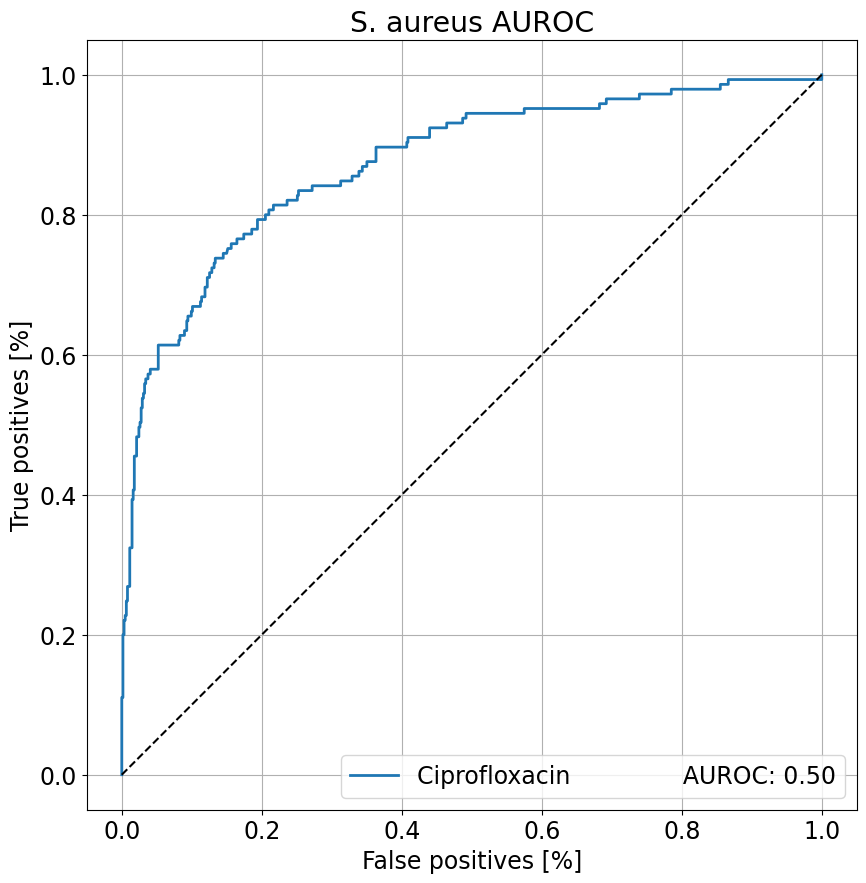

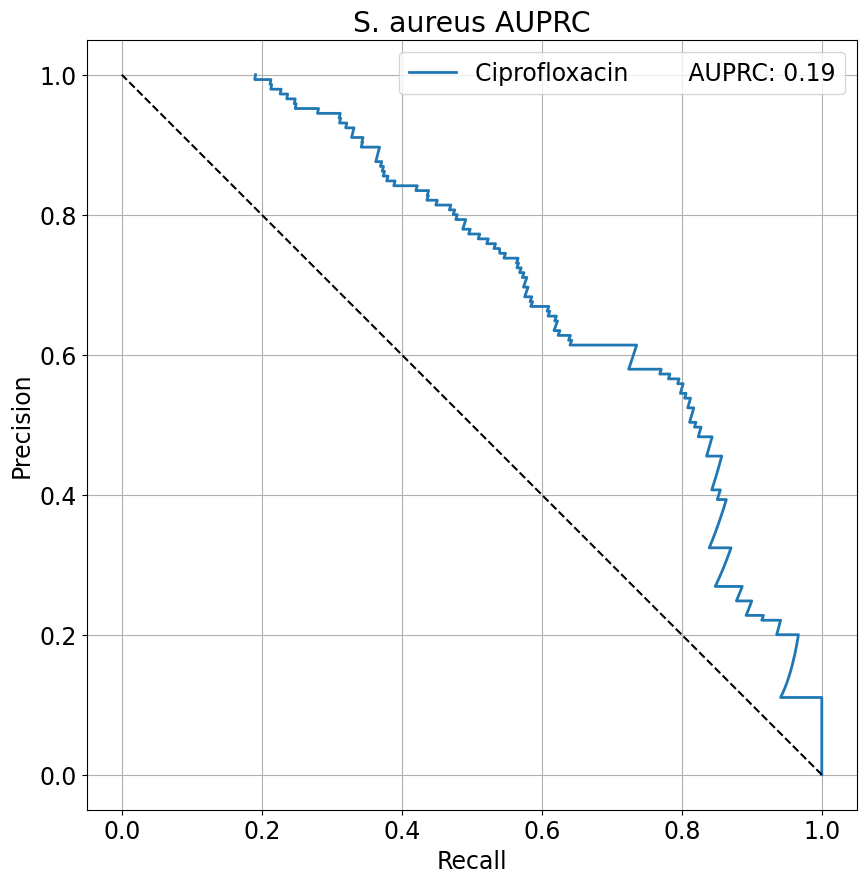

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams.update({'font.size': 17})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.title('E. coli CNN')
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.title('S. aureus AUROC')

  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')
plot_roc("Ciprofloxacin               AUROC: %0.2f" % baseline_results[8], y_test, test_predictions_baseline, color=colors[0])

plt.legend(loc='lower right')
plt.savefig('s_aureus_auroc.png', bbox_inches='tight')
plt.show()

def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.title('S. aureus AUPRC')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.plot([1, 0], [0, 1], 'k--')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

plot_prc("Ciprofloxacin        AUPRC: %0.2f" % baseline_results[9], y_test, test_predictions_baseline, color=colors[0])

plt.legend(loc='upper right')
plt.savefig('s_aureus_auprc.png', bbox_inches='tight')
plt.show()